# PCA and Factor Analysis for APT

## 1. Motivation

공인회계사 시험을 준비하는 과정에서 재무관리는 단순한 계산 과목이라기보다, 통계적 사고와 연결될 수 있는 영역이라는 점에서 흥미롭게 다가왔다. 특히 응용통계학을 전공하면서 재무관리의 여러 주제들이 데이터 분석 관점에서 확장될 수 있는 여지가 크다고 느꼈다.

수험 목적에서는 차익거래가격결정모형(APT)을 주어진 요인과 베타 값에 대입하여 기대수익률을 계산하는 수준에서 다루는 경우가 많다. 그러나 APT는 본질적으로 **공통요인에 의해 자산 수익률이 설명된다는 통계적 요인모형**에 기반하고 있다.

실무 데이터 분석에서는 이러한 공통요인을 추출하기 위해 **주성분분석(PCA)** 이 자주 활용되며, 이론적으로는 **요인분석(Factor Analysis)** 이 APT의 구조적 기반에 해당한다.  

따라서 동일한 수익률 데이터를 대상으로 PCA와 Factor Analysis를 각각 수행하고,

- 공통요인 추출 방식의 차이  
- 설명력의 차이  
- APT 관점에서의 해석 가능성  

을 비교함으로써, 차익거래모형을 데이터 기반에서 어떻게 이해할 수 있는지 살펴보고자 한다.

---

## 2. APT and the Factor Model

APT는 자산 수익률이 여러 개의 체계적 요인에 의해 결정된다고 가정한다. 기본적인 요인모형은 다음과 같이 표현된다.

$$
R_i = E(R_i) + b_{i1}F_1 + b_{i2}F_2 + \cdots + b_{ik}F_k + \varepsilon_i
$$

where

- $R_i$ : 자산 $i$ 의 실제 수익률  
- $E(R_i)$ : 기대수익률  
- $F_k$ : 공통요인 (systematic factors)  
- $b_{ik}$ : 요인민감도 (factor loading)  
- $\varepsilon_i$ : 개별요인 (idiosyncratic risk)  

이 모형은 자산 수익률을 **공통요인에 의한 부분과 개별오차로 분해**하는 구조를 가진다.

---

## 3. Assumptions of the Factor Model

요인모형은 다음과 같은 기본 가정을 따른다.

### (1) 공통요인의 평균

$$
E(F_k) = 0
$$

공통요인은 평균이 0인 확률변수로 가정된다.

---

### (2) 개별오차의 평균

$$
E(\varepsilon_i) = 0
$$

개별요인은 체계적 편향 없이 평균적으로 0이다.

---

### (3) 공통요인 간 독립성

$$
Cov(F_j, F_k) = 0 \quad (j \neq k)
$$

각 요인은 서로 독립적인 정보원을 반영한다.

---

### (4) 공통요인과 개별오차의 독립성

$$
Cov(F_k, \varepsilon_i) = 0
$$

체계적 요인과 개별위험은 서로 독립이다.

---

### (5) 개별오차 간 독립성

$$
Cov(\varepsilon_i, \varepsilon_j) = 0 \quad (i \neq j)
$$

개별위험은 자산 간에 상관되지 않는다.

---

## 4. Variance Decomposition and Explanatory Power

요인모형의 중요한 특징은 자산 수익률의 분산을 **체계적 요인에 의해 설명되는 부분과 비체계적 위험으로 분해**할 수 있다는 점이다.

자산 $i$ 의 분산은 다음과 같이 표현된다.

$$
Var(R_i) = \sum_{k=1}^{K} b_{ik}^2 Var(F_k) + Var(\varepsilon_i)
$$

이를 통해

- 첫 번째 항: 공통요인에 의해 설명되는 분산 (systematic variance)  
- 두 번째 항: 개별요인에 의한 분산 (idiosyncratic variance)  

으로 구분된다.

요인모형의 설명력은 다음과 같이 해석할 수 있다.

$$
\text{Explained Ratio}
=
\frac{\sum_{k=1}^{K} b_{ik}^2 Var(F_k)}
{Var(R_i)}
$$

즉, 전체 변동성 중 공통요인이 설명하는 비율이 높을수록 해당 요인구조의 설명력이 높다고 볼 수 있다.

이러한 분산분해 구조는 이후 PCA와 Factor Analysis를 비교할 때,

- 얼마나 많은 분산을 설명하는가  
- 설명된 분산의 의미가 무엇인가  

를 평가하는 기준이 된다.

---

본 분석에서는 Python 환경에서 `yfinance` 라이브러리를 활용하여 Yahoo Finance의 공개 시장 데이터를 수집하고, 이를 PCA와 Factor Analysis의 입력 데이터로 사용하였다. 다운로드한 종가 데이터를 기반으로 일별 수익률을 계산하여 분석에 활용하였다.


## 2. Data Preprocessing

prices shape: (2042, 20)
rets shape: (2041, 20)
price columns sample: Index(['AAPL', 'ABBV', 'AMZN', 'BAC', 'GOOGL'], dtype='object')


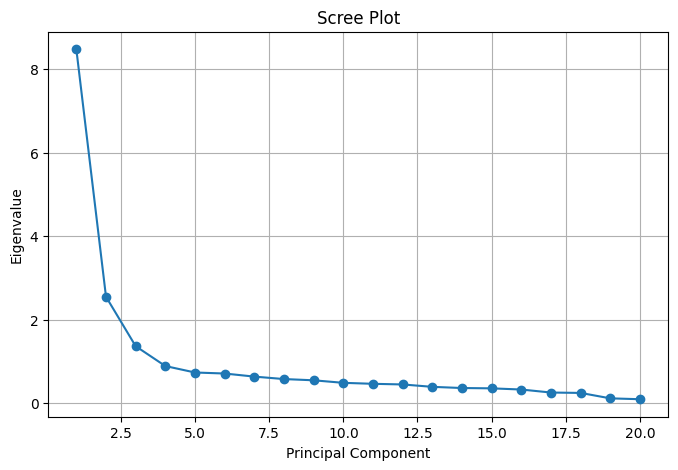

Cumulative explained variance:
PC1: 0.424
PC2: 0.551
PC3: 0.619
PC4: 0.664
PC5: 0.700
PC6: 0.736
PC7: 0.767
PC8: 0.796
PC9: 0.823
PC10: 0.848
PC11: 0.871
PC12: 0.893
PC13: 0.913
PC14: 0.931
PC15: 0.948
PC16: 0.965
PC17: 0.977
PC18: 0.990
PC19: 0.995
PC20: 1.000


In [22]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "META",
    "NVDA", "TSLA", "JPM", "XOM", "JNJ",
    "PG", "UNH", "HD", "V", "MA",
    "KO", "PEP", "MRK", "ABBV", "BAC"
]

start = "2018-01-01"
end = None  # 오늘까지

raw = yf.download(
    tickers,
    start=start,
    end=end,
    group_by="column",
    auto_adjust=False,   # Adj Close가 제공되면 쓰기 위해 False
    progress=False,
    threads=True
)

def pick_price(df: pd.DataFrame, prefer: str = "Adj Close") -> pd.DataFrame:
    """
    yfinance 결과에서 (Date x Ticker) 가격 DataFrame 반환.
    - MultiIndex 컬럼 순서가 (Field, Ticker)이든 (Ticker, Field)이든 모두 지원
    - prefer 우선: "Adj Close" -> 없으면 "Close"
    """
    # MultiIndex columns
    if isinstance(df.columns, pd.MultiIndex):
        lv0 = df.columns.get_level_values(0)
        lv1 = df.columns.get_level_values(1)

        fields = [prefer, "Close"] if prefer != "Close" else ["Close", "Adj Close"]

        # Case A: (Field, Ticker)
        if any(f in lv0 for f in fields):
            for f in fields:
                if f in lv0:
                    px = df[f]  # columns become tickers
                    px = px.copy()
                    px.columns.name = None
                    return px

        # Case B: (Ticker, Field)
        if any(f in lv1 for f in fields):
            for f in fields:
                if f in lv1:
                    px = df.xs(f, level=1, axis=1)  # columns become tickers
                    px = px.copy()
                    px.columns.name = None
                    return px

        raise KeyError(
            f"가격 컬럼({fields})을 못 찾음. "
            f"level0 예시={sorted(set(lv0))[:8]}, level1 예시={sorted(set(lv1))[:8]}"
        )

    # Single-level columns (단일 티커일 때)
    cols = df.columns
    if prefer in cols:
        return df[[prefer]].rename(columns={prefer: tickers[0]})
    if "Close" in cols:
        return df[["Close"]].rename(columns={"Close": tickers[0]})

    raise KeyError(f"가격 컬럼(Adj Close/Close) 없음. 컬럼: {list(cols)}")


prices = pick_price(raw)

# 결측치 처리(상장일 차이 등)
prices = prices.dropna(how="all").ffill().dropna()

# 일간 로그수익률
rets = np.log(prices).diff().dropna()

print("prices shape:", prices.shape)
print("rets shape:", rets.shape)
print("price columns sample:", prices.columns[:5])
prices.tail()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# =========================
# Scree Plot (PCA)
# =========================

# PCA는 평균 0 기준이 좋으므로 표준화 (공분산 기반으로 해석하려면 그대로 써도 되지만, 보통 표준화 권장)
rets_std = (rets - rets.mean()) / rets.std()

# PCA 수행
pca = PCA()
pca.fit(rets_std)

# 고유값 (= 설명된 분산)
eigenvalues = pca.explained_variance_

# 설명비율
explained_ratio = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

# 누적 설명비율 (참고 출력)
cum_ratio = np.cumsum(explained_ratio)
print("Cumulative explained variance:")
for i, v in enumerate(cum_ratio, 1):
    print(f"PC{i}: {v:.3f}")



요인 수 결정을 위해 Scree plot을 확인한 결과, 초기 몇 개의 고유값이 급격히 감소한 이후 3~4번째 요인부터 완만한 감소 형태를 보였다. 이는 해당 지점 이후의 추가 요인이 설명력 증가에 크게 기여하지 않음을 의미한다.

또한 Kaiser 기준(eigenvalue > 1)을 적용한 결과 역시 약 3~4개의 요인이 유지되는 것으로 나타났다. 따라서 이후 분석에서는 주요 공통요인을 반영하면서도 과도한 차원 증가를 방지하기 위해 요인 수를 3~4개 수준으로 설정하였다.


## 3. Factor Analysis and Summary

3요인을 사용하기로 결정했고 이에 대한 수행결과는 아래와 같다.

In [23]:
import sys, subprocess
subprocess.run(
    [sys.executable, "-m", "pip", "install", "-q", "scikit-learn"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL
)

from sklearn.decomposition import FactorAnalysis

# 종목별 변동성(스케일) 차이가 요인 추정을 지배하지 않도록, FA에도 표준화된 수익률(rets_std)을 입력
returns = rets_std            
X = returns.values        

fa = FactorAnalysis(n_components=3, random_state=0)
factors = fa.fit_transform(X)

# Factor Loadings
loadings = pd.DataFrame(
    fa.components_.T,
    index=returns.columns,
    columns=["Factor1", "Factor2", "Factor3"]
)

loadings.round(3)


,Factor1,Factor2,Factor3
AAPL,-0.692,-0.385,0.036
ABBV,-0.457,0.006,-0.259
AMZN,-0.566,-0.499,0.247
BAC,-0.830,0.382,0.193
GOOGL,-0.654,-0.420,0.165
HD,-0.677,-0.130,-0.121
JNJ,-0.500,0.040,-0.470
JPM,-0.838,0.387,0.180
KO,-0.599,0.081,-0.545
MA,-0.787,-0.148,-0.024


In [24]:
top_k = 7
print(loadings.abs().sort_values("Factor1", ascending=False).head(top_k))
print(loadings.abs().sort_values("Factor2", ascending=False).head(top_k))
print(loadings.abs().sort_values("Factor3", ascending=False).head(top_k))
communalities = (loadings**2).sum(axis=1).sort_values(ascending=False)
print(communalities.head(10))


       Factor1   Factor2   Factor3
JPM   0.837855  0.386849  0.180288
BAC   0.830224  0.382357  0.193400
V     0.790222  0.127061  0.035866
MA    0.786820  0.147609  0.024476
MSFT  0.717916  0.479537  0.081679
AAPL  0.692198  0.384734  0.035970
HD    0.676841  0.130035  0.120787
        Factor1   Factor2   Factor3
AMZN   0.566025  0.499373  0.247013
MSFT   0.717916  0.479537  0.081679
NVDA   0.563602  0.426394  0.266407
GOOGL  0.654240  0.420427  0.164651
META   0.535283  0.413696  0.213761
JPM    0.837855  0.386849  0.180288
AAPL   0.692198  0.384734  0.035970
       Factor1   Factor2   Factor3
PEP   0.574226  0.047531  0.618640
PG    0.516495  0.045972  0.587949
KO    0.598650  0.080762  0.545396
JNJ   0.499918  0.040346  0.470060
MRK   0.435924  0.017957  0.361058
NVDA  0.563602  0.426394  0.266407
ABBV  0.457142  0.005669  0.259309
JPM      0.884158
BAC      0.872871
MSFT     0.752030
PEP      0.714710
KO       0.662361
V        0.641881
MA       0.641474
GOOGL    0.631899
AMZN    

## Interpretation of Factor Structure

요인분석 결과, APT 일반식의 요인베타에 해당하는 factor loading을 기준으로 각 요인에 가장 민감하게 반응하는 상위 7개 종목을 확인하였다. 또한 Communality 기준으로 추정된 세 개의 공통요인에 의해 가장 잘 설명되는 종목은 **GOOGL**, **AMZN**, **AAPL**로 나타났으며, 이는 이들 종목의 수익률 변동이 공통요인의 영향을 크게 받음을 의미한다.

Factor Analysis는 자산 수익률의 공분산 구조를 가장 잘 설명하는 공통요인을 통계적으로 추출하고, 각 자산의 요인 민감도(loading)를 추정하는 방법이다. 그러나 이 과정에서 도출되는 요인은 순전히 통계적 기준에 의해 결정되며, 요인 자체에 대한 경제적 의미가 자동으로 부여되는 것은 아니다. 따라서 각 요인이 시장요인, 금리요인, 경기요인 등 어떠한 위험을 반영하는지는 상위 loading 종목의 특성과 거시경제적 맥락을 바탕으로 분석자가 해석해야 한다는 한계가 있다.

이러한 점을 고려하여, 각 요인의 경제적 의미를 해석하면 다음과 같다.

## Factor 1 : Market Factor

대부분의 종목에서 양(+)의 loading이 나타났으며, 특히 메가캡 기술주와 대형주에서 높은 값을 보였다. 이는 전체 시장 움직임에 대한 공통 민감도를 반영하는 요인으로 해석할 수 있다. 즉, 시장 전반의 상승 또는 하락에 따라 광범위한 자산이 동시에 반응하는 체계적 위험을 나타낸다.

## Factor 2 : Financial / Interest Rate Factor

금융 관련 종목에서 상대적으로 높은 loading이 나타났다. 은행 및 금융업은 금리 수준과 신용환경 변화에 민감하게 반응하므로, 해당 요인은 금리 또는 금융환경 변화와 관련된 위험요인으로 해석할 수 있다.

## Factor 3 : Energy / Cyclical Factor

에너지 및 경기민감 업종에서 높은 loading이 관찰되었다. 이는 원자재 가격이나 경기순환과 관련된 요인을 반영하는 것으로 볼 수 있으며, 거시경제 환경 변화에 따른 산업별 민감도를 나타낸다.

이러한 결과는 자산 수익률이 소수의 공통요인에 의해 설명될 수 있음을 보여주며, Factor Analysis를 통해 도출된 요인은 APT 모형에서의 체계적 요인(Systematic Factors)으로 해석할 수 있다.